<a href="https://colab.research.google.com/github/heispv/tf-class-december2023/blob/master/09_handwritten_digit_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import random

# Data ingestion

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

# Data visualization

In [4]:
def ax_shansi(x, y):
    max_number = x.shape[0]
    i = np.random.randint(0, max_number)

    plt.figure(figsize=(3, 3))
    plt.imshow(x[i], cmap='gray')
    plt.title(f'label: {y[i]}')
    plt.axis('off')
    plt.show()

In [5]:
# Creating a function to visualize a random example from the given data
def show_random_example(images, labels):
  """By giving a images and their corresponding labels
   you would get 9 random of them"""
  random_idx = random.sample(range(len(images)), 9)
  random_images = [images[i] for i in random_idx]
  random_labels = [labels[i] for i in random_idx]

  plt.figure(figsize=(7, 8))
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(random_images[i], cmap='gist_gray')
    plt.title(f"label= {random_labels[i]}")
    plt.axis("off")

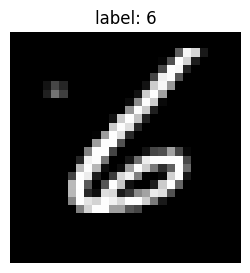

In [6]:
ax_shansi(x_train, y_train)

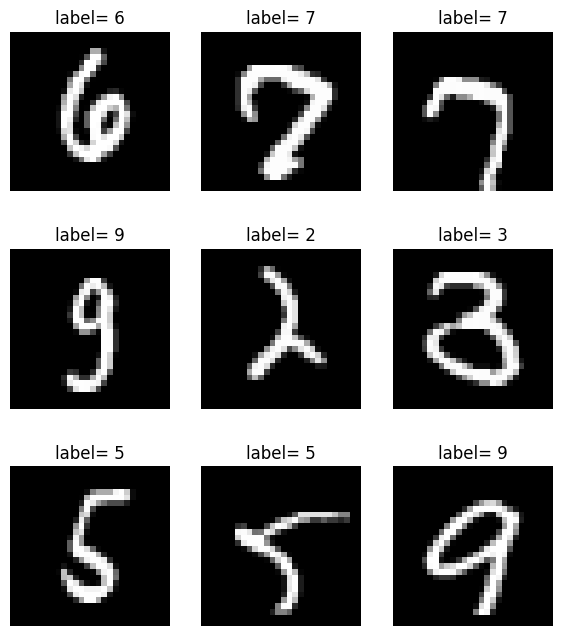

In [7]:
show_random_example(x_train, y_train)

# Data preprocessing

In [8]:
x_train = x_train / 255.0

In [9]:
x_test = x_test / 255.

Be in nokte deghat konim ke be komake taghsim kardane `x_train` bar adade `255` bazeye adade ma beyne `0 ta 1` gharar migirand, va midoonim ke neural network ha ham, alaghe be in daran ke adade beyne `0 ta 1` ro be onvane vurudi daryaft konan.

In [10]:
type(255), type(255.)

(int, float)

In [11]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
y_train_one_hot = tf.one_hot(y_train, 10)

In [14]:
y_train_one_hot[:3]

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [15]:
y_train_one_hot.shape

TensorShape([60000, 10])

In [16]:
y_test_one_hot = tf.one_hot(y_test, 10)

In [17]:
y_test_one_hot.shape

TensorShape([10000, 10])

Bayad zamani ke classification anjam midim, khurji hamoon ro `one hot encoding` anjam bedim. be komake `one hot encoding` dar vaghe be layeye akhar ejaze midim ke ehtemale har kudum az label haye mokhtalef ro mohasebe kone va ma dar enteha label i ke bishtarin ehtemal ro dare, be onvane natijeye nahai entekhab mikonim.

# Model Training

In [18]:
28 * 28

784

In [19]:
x_train[5].shape

(28, 28)

In [20]:
x = keras.layers.Input(shape=(28, 28))

In [21]:
keras.layers.Flatten()(x)

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>

In [110]:
# Create the model
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [111]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics='accuracy')

In [112]:
# Fit the data
history = model.fit(
    x_train,
    y_train_one_hot,
    validation_data=(x_test, y_test_one_hot),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2438 - accuracy: 0.9291 - val_loss: 0.1276 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1037 - accuracy: 0.9692 - val_loss: 0.0934 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.0848 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0885 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0801 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0829 - val_accuracy

Yek function benvisin ke miad 1 index e random migire, va miad rooye oon prediction anjam mide. hala yek ax plot mikone ke ham label e vaghei vujud dare va ham prediction e model.

In [22]:
x_test.shape

(10000, 28, 28)

In [24]:
x_test[45].shape

(28, 28)

In [23]:
tf.expand_dims(x_test[45], axis=0).shape

TensorShape([1, 28, 28])

In [ ]:
model.predict(tf.expand_dims(x_test[45], axis=0))